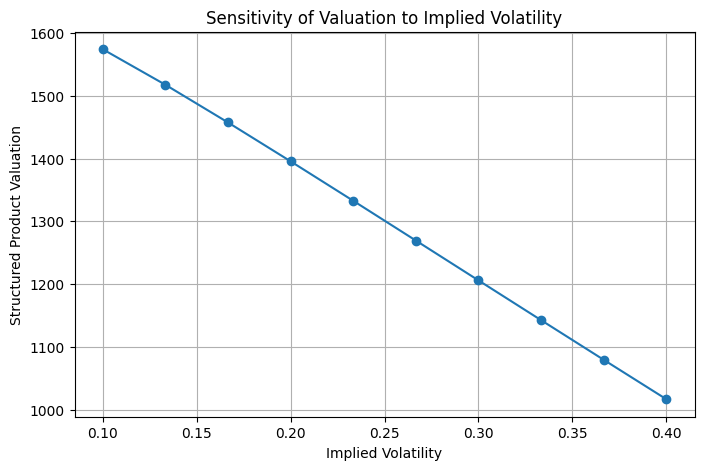

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

#parameters
S0 = 5996.66  # Initial S&P 500 index level
K_cap = 1.1167 * S0  # Cap level (strike for the short call)
K_buffer = 0.95 * S0  # Strike for digital put
r = 0.04088  # Risk-free rate (4.088%)
q = 0.01327  # Dividend yield (1.327%)
T = 2.98  # Time to maturity in years
sigma_base = 0.20  # Base implied volatility (20%)

# Function to calculate Black-Scholes option prices
def black_scholes(S, K, T, r, q, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)

# Function to compute the structured product value under different conditions
def compute_valuation(S0, sigma, r, q, T):
    # Zero-coupon bond value
    bond_value = 1175 * np.exp(-r * T)

    # Long call option (mimicking leveraged upside)
    long_call_value = black_scholes(S0, S0, T, r, q, sigma, "call")

    # Short call option at cap level (limiting upside)
    short_call_value = black_scholes(S0, K_cap, T, r, q, sigma, "call")

    # Short digital put (buffer implementation)
    digital_put_value = black_scholes(S0, K_buffer, T, r, q, sigma, "put")

    # Total valuation (static replication)
    valuation = bond_value + (1.5 * long_call_value) - short_call_value - digital_put_value
    return valuation

# Sensitivity Analysis for Volatility
volatility_range = np.linspace(0.10, 0.40, 10)  # Testing volatilities from 10% to 40%
valuation_results = [compute_valuation(S0, sigma, r, q, T) for sigma in volatility_range]

# Plot results
plt.figure(figsize=(8,5))
plt.plot(volatility_range, valuation_results, marker='o', linestyle='-')
plt.xlabel('Implied Volatility')
plt.ylabel('Structured Product Valuation')
plt.title('Sensitivity of Valuation to Implied Volatility')
plt.grid(True)
plt.show()

